In [1]:
import os, sys, logging

import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from kcm import *  

In [2]:
probs = np.array([]) #np.arange(0.2, .8, 0.2)
 
for prob in probs:
    print("Probability: {}".format(prob))
    east_kcm = EastKCM(prob, 50, 200, 50000)
    trajectory = east_kcm.gen_trajectory()
    draw_trajectory(trajectory)

This is what we want to see (also a reference for the parameter ranges)

![goal.png](./goal1.png)


INFO:root:Softening parameter, \epsilon: 0.00019
INFO:root:Neighboring spins; Rate activation; Rate inactivation
INFO:root:Neighbors [1 1]
INFO:root:Rate Activation 2.00019
INFO:root:Rate Deactivation 0.5000475
INFO:root:Neighbors [1 0]
INFO:root:Rate Activation 1.00019
INFO:root:Rate Deactivation 0.2500475
INFO:root:Neighbors [0 1]
INFO:root:Rate Activation 1.00019
INFO:root:Rate Deactivation 0.2500475
INFO:root:Neighbors [0 0]
INFO:root:Rate Activation 0.00019
INFO:root:Rate Deactivation 4.75e-05
INFO:root:Biasing field: 0.0
INFO:root:Rate swap: 1.0


Activity: 0.0655


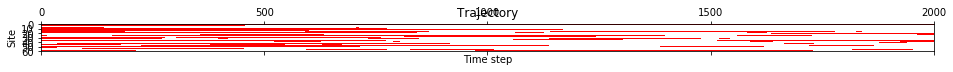

INFO:root:Softening parameter, \epsilon: 0.0063
INFO:root:Neighboring spins; Rate activation; Rate inactivation
INFO:root:Neighbors [1 1]
INFO:root:Rate Activation 2.0063
INFO:root:Rate Deactivation 0.501575
INFO:root:Neighbors [1 0]
INFO:root:Rate Activation 1.0063
INFO:root:Rate Deactivation 0.251575
INFO:root:Neighbors [0 1]
INFO:root:Rate Activation 1.0063
INFO:root:Rate Deactivation 0.251575
INFO:root:Neighbors [0 0]
INFO:root:Rate Activation 0.0063
INFO:root:Rate Deactivation 0.001575
INFO:root:Biasing field: 0.0
INFO:root:Rate swap: 1.0


Activity: 0.059


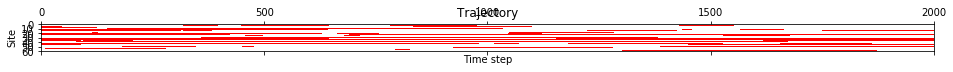

INFO:root:Softening parameter, \epsilon: 0.019
INFO:root:Neighboring spins; Rate activation; Rate inactivation
INFO:root:Neighbors [1 1]
INFO:root:Rate Activation 2.019
INFO:root:Rate Deactivation 0.50475
INFO:root:Neighbors [1 0]
INFO:root:Rate Activation 1.019
INFO:root:Rate Deactivation 0.25475
INFO:root:Neighbors [0 1]
INFO:root:Rate Activation 1.019
INFO:root:Rate Deactivation 0.25475
INFO:root:Neighbors [0 0]
INFO:root:Rate Activation 0.019
INFO:root:Rate Deactivation 0.00475
INFO:root:Biasing field: 0.0
INFO:root:Rate swap: 1.0


Activity: 0.0605


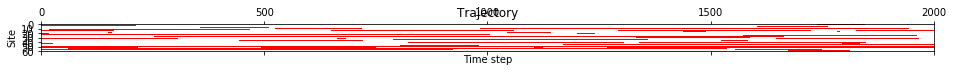

In [3]:
epsilons = np.array([1.9e-4, 6.3e-3,1.9e-2])

logging.basicConfig(level=logging.INFO)

for eps in epsilons:
    logging.info("Softening parameter, \epsilon: {}".format(eps))
    fa_kcm = SoftenedFA(gamma=0.25, s=0., eps=eps, num_burnin_steps=0, num_sites=60, num_steps=2000)
    trajectory = fa_kcm.gen_trajectory()
    print("Activity: {}".format(fa_kcm.activity(trajectory)))
    draw_trajectory(trajectory)

INFO:root:Softening parameter, \epsilon: 0.00019
INFO:root:Neighboring spins; Rate activation; Rate inactivation
INFO:root:Neighbors [1 1]
INFO:root:Rate Activation 2.00019
INFO:root:Rate Deactivation 0.5000475
INFO:root:Neighbors [1 0]
INFO:root:Rate Activation 1.00019
INFO:root:Rate Deactivation 0.2500475
INFO:root:Neighbors [0 1]
INFO:root:Rate Activation 1.00019
INFO:root:Rate Deactivation 0.2500475
INFO:root:Neighbors [0 0]
INFO:root:Rate Activation 0.00019
INFO:root:Rate Deactivation 4.75e-05
INFO:root:Biasing field: 0.01
INFO:root:Rate swap: 0.998006788436


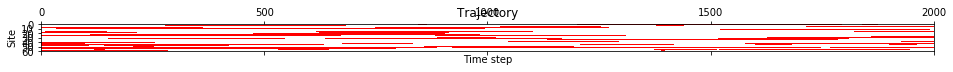

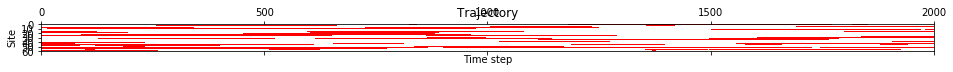

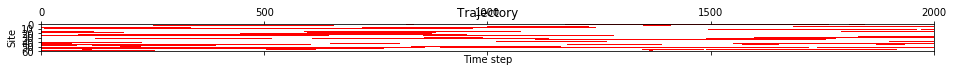

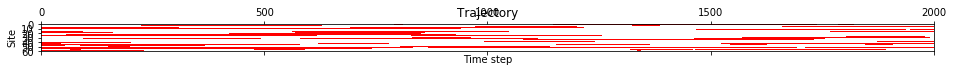

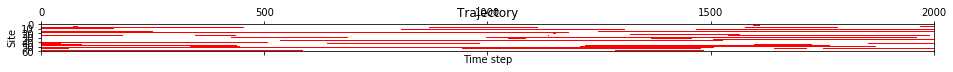

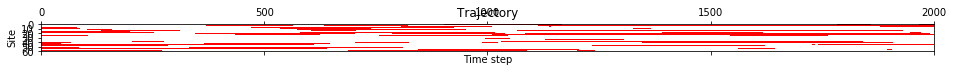

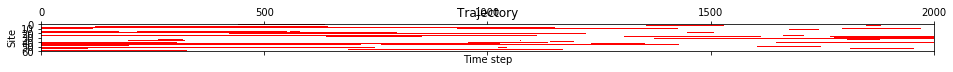

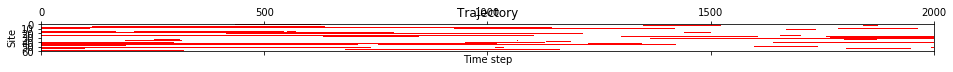

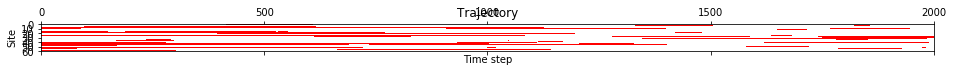

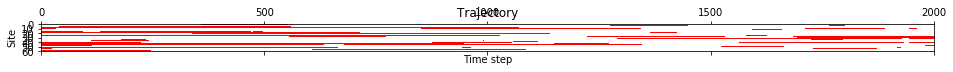

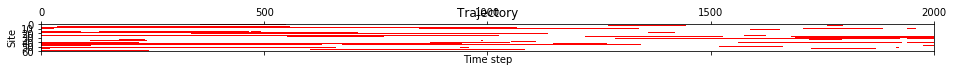

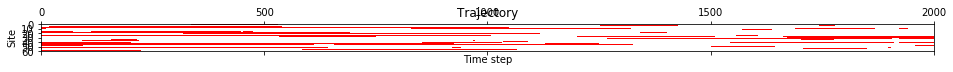

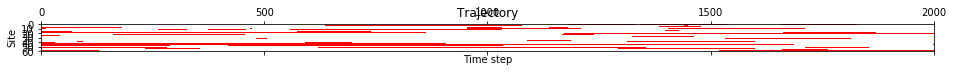

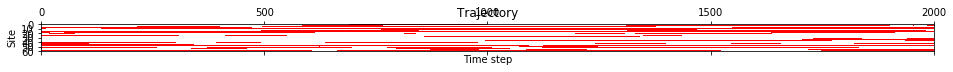

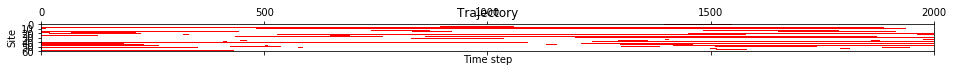

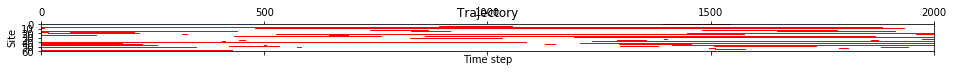

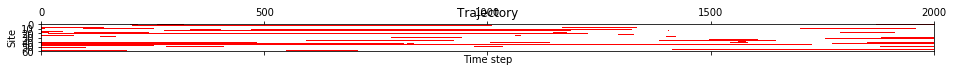

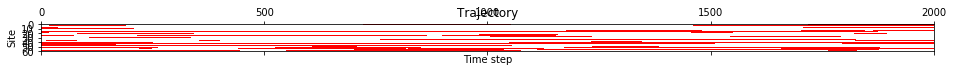

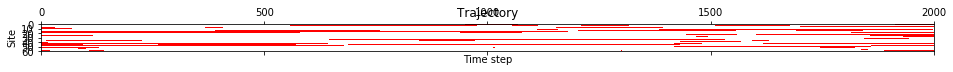

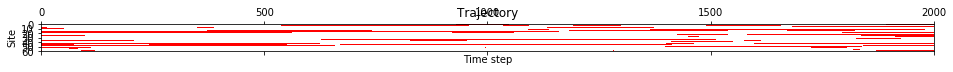

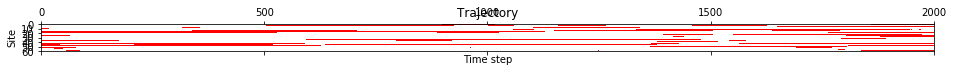

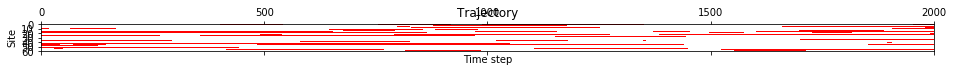

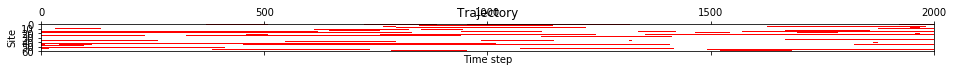

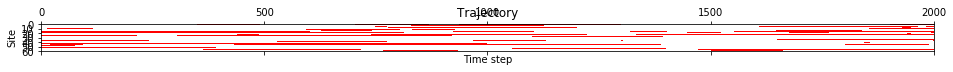

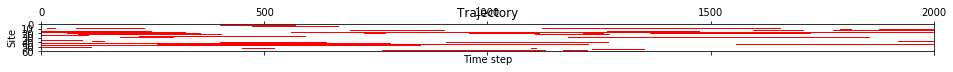

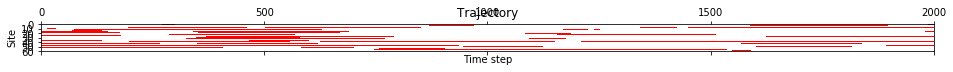

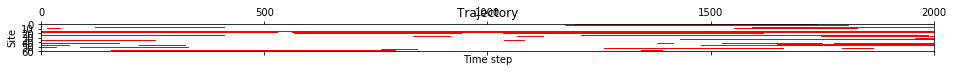

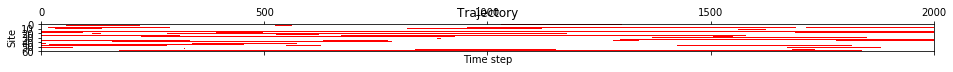

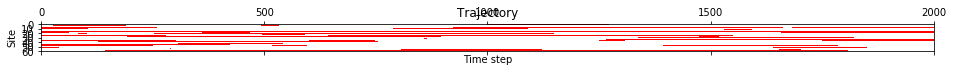

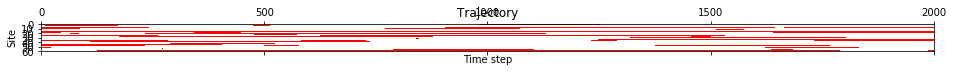

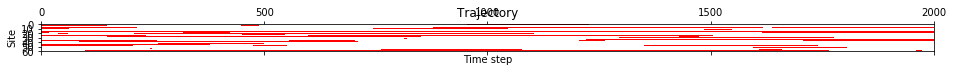

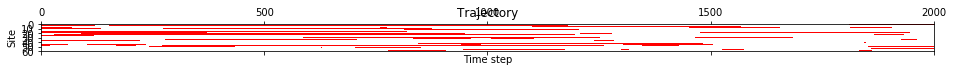

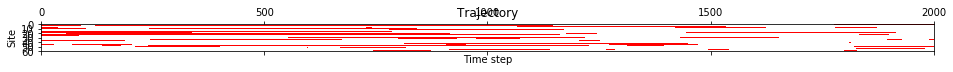

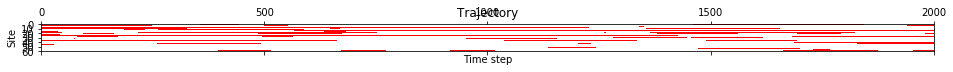

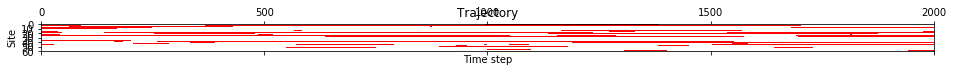

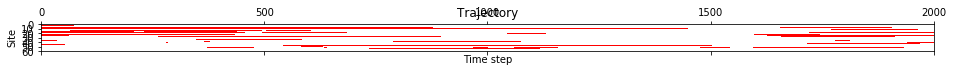

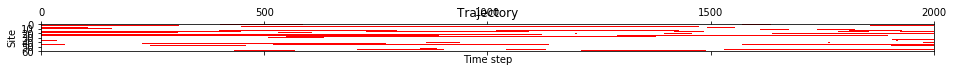

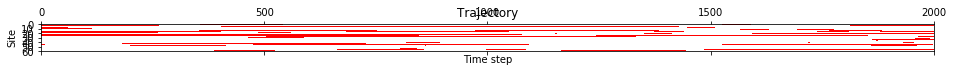

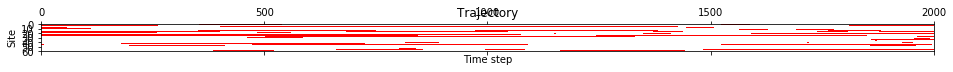

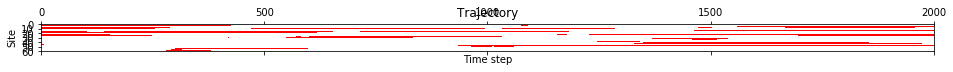

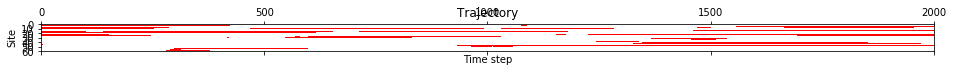

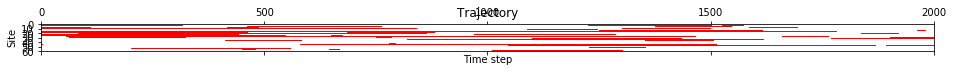

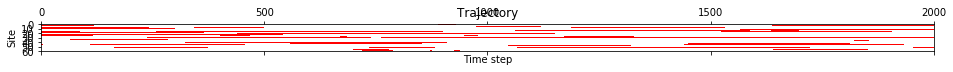

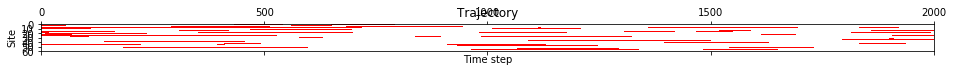

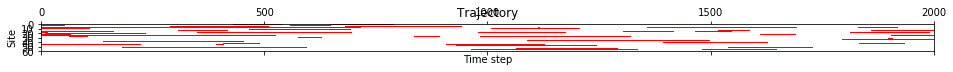

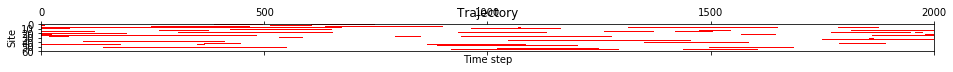

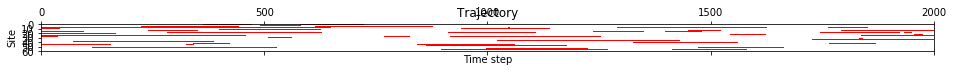

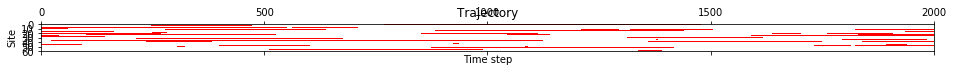

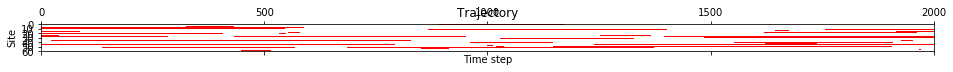

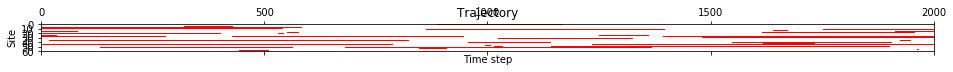

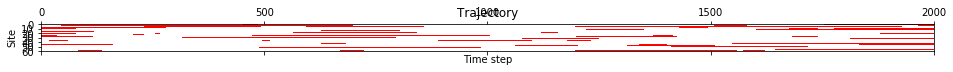

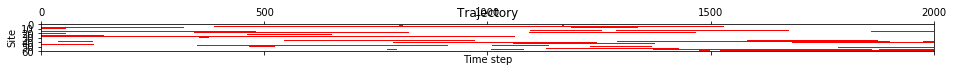

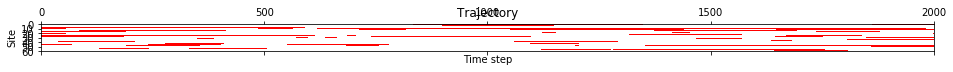

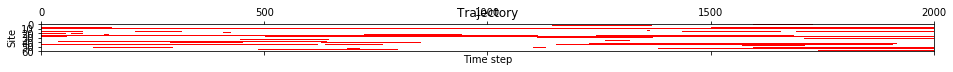

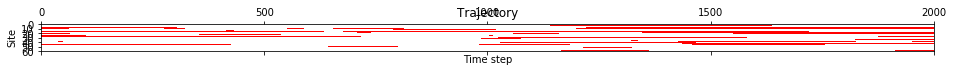

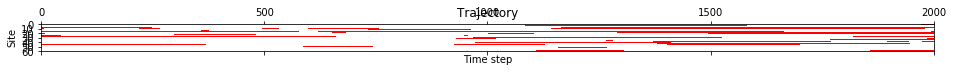

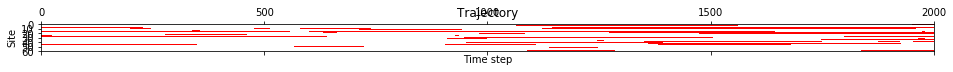

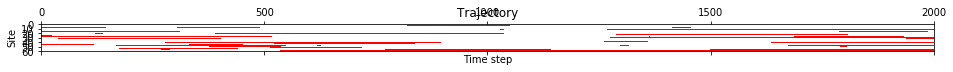

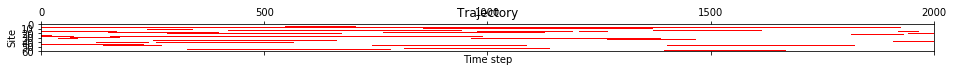

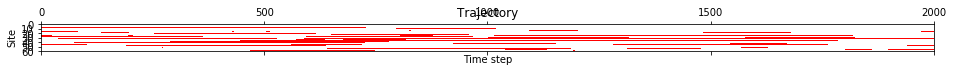

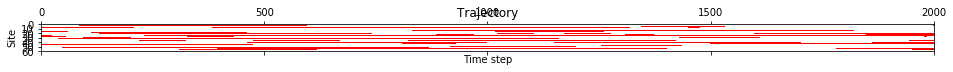

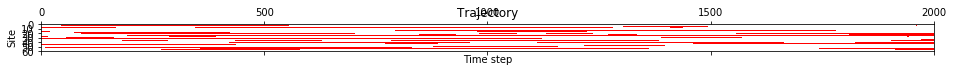

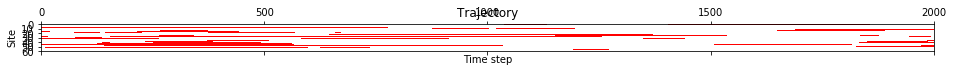

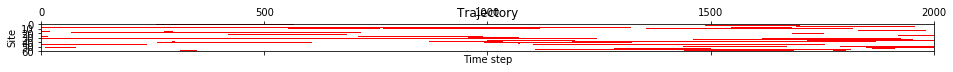

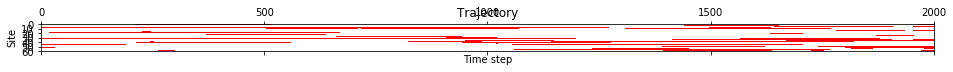

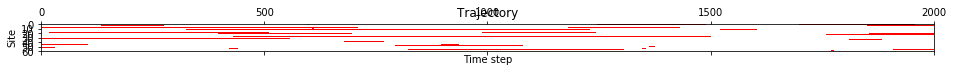

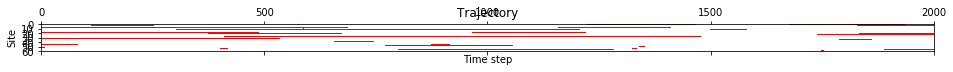

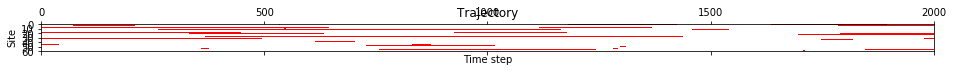

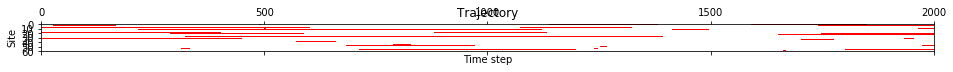

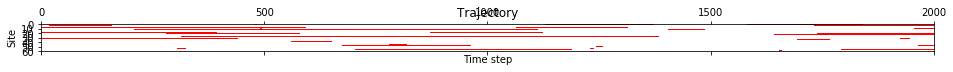

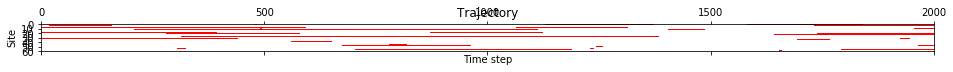

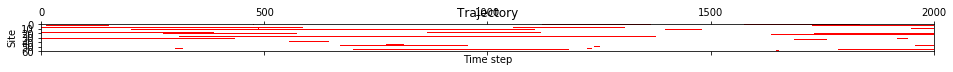

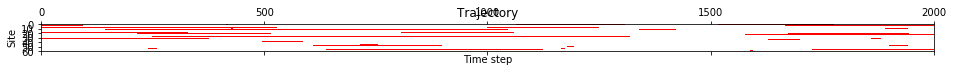

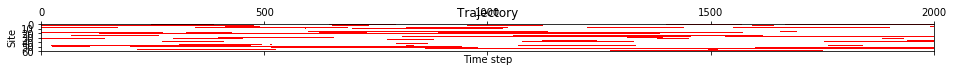

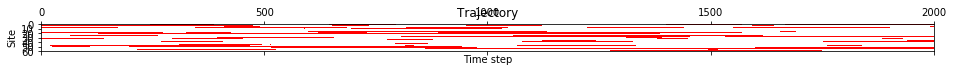

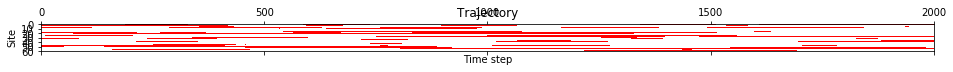

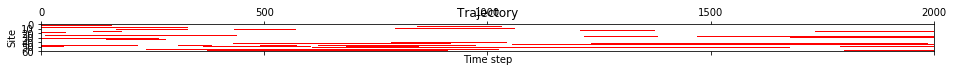

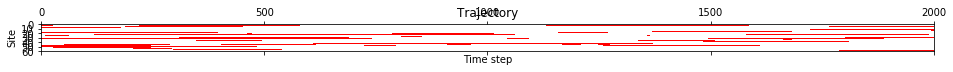

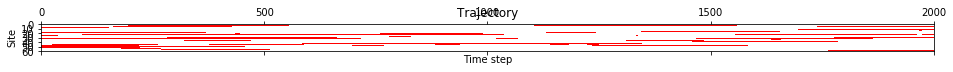

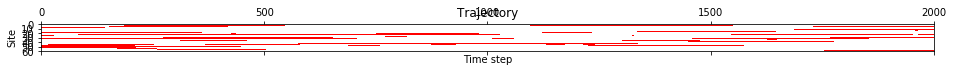

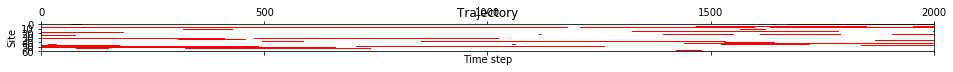

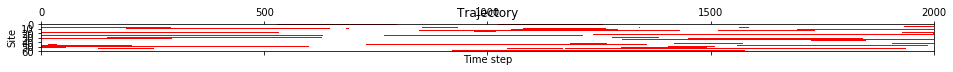

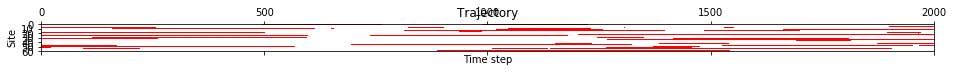

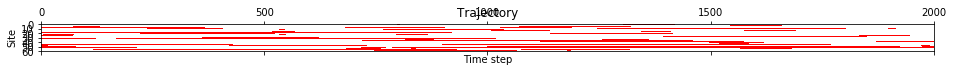

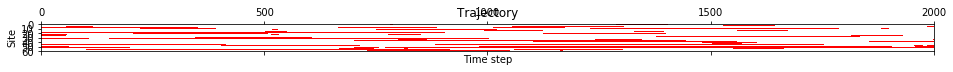

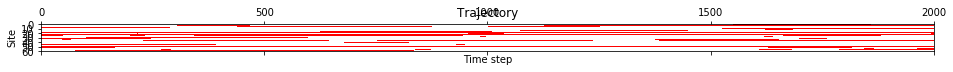

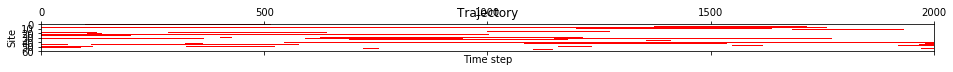

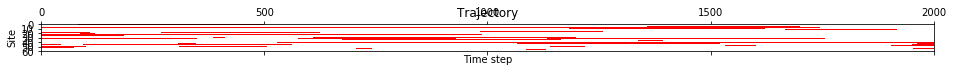

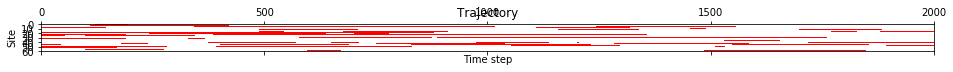

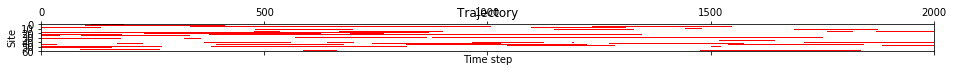

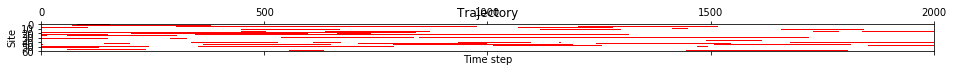

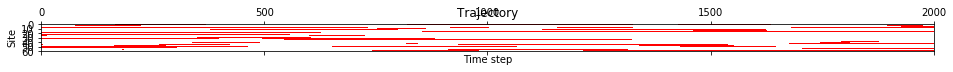

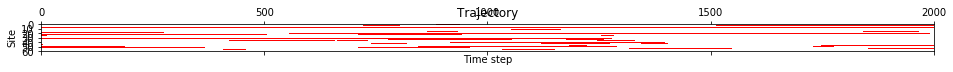

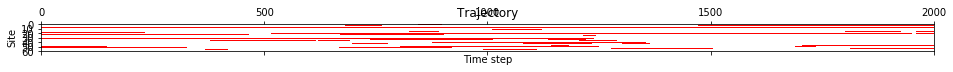

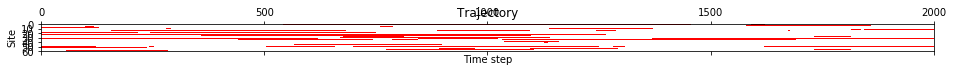

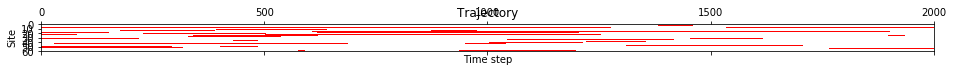

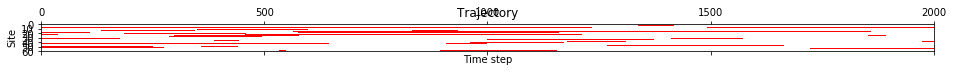

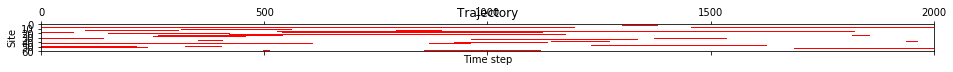

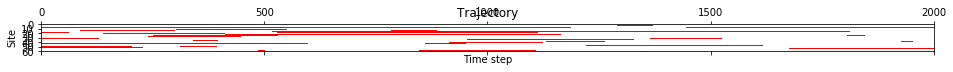

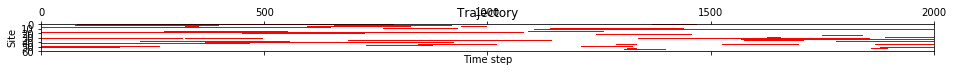

INFO:root:Softening parameter, \epsilon: 0.0063
INFO:root:Neighboring spins; Rate activation; Rate inactivation
INFO:root:Neighbors [1 1]
INFO:root:Rate Activation 2.0063
INFO:root:Rate Deactivation 0.501575
INFO:root:Neighbors [1 0]
INFO:root:Rate Activation 1.0063
INFO:root:Rate Deactivation 0.251575
INFO:root:Neighbors [0 1]
INFO:root:Rate Activation 1.0063
INFO:root:Rate Deactivation 0.251575
INFO:root:Neighbors [0 0]
INFO:root:Rate Activation 0.0063
INFO:root:Rate Deactivation 0.001575
INFO:root:Biasing field: 0.01
INFO:root:Rate swap: 0.998006788436


Activity: 0.0576


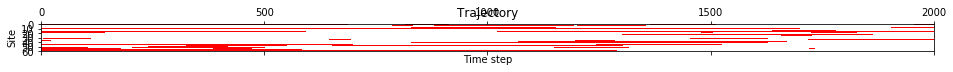

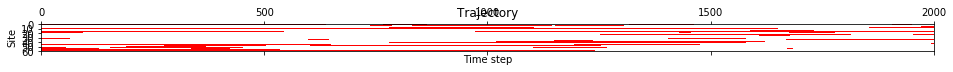

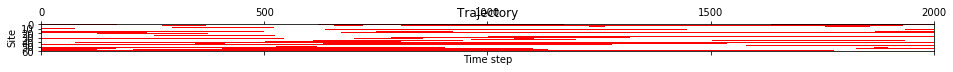

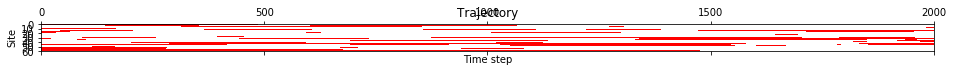

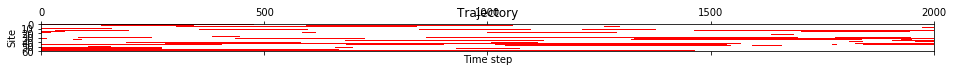

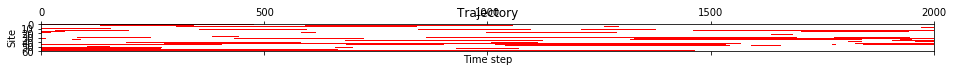

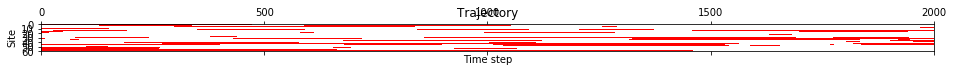

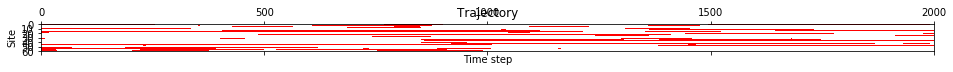

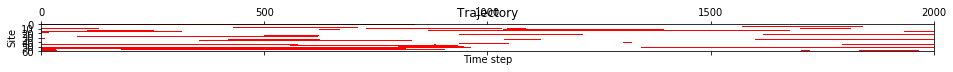

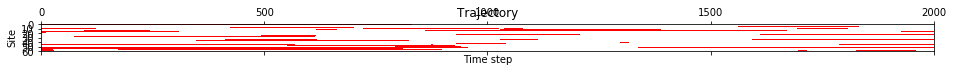

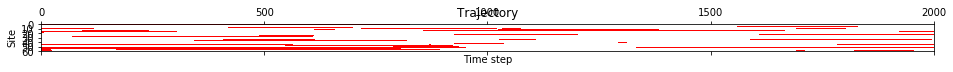

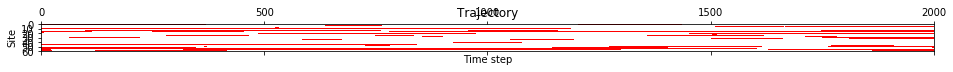

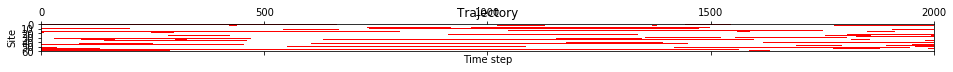

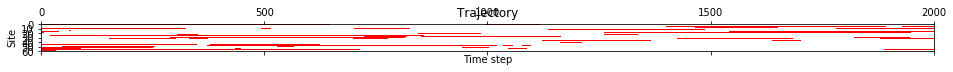

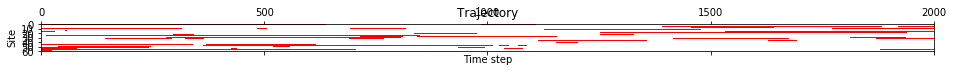

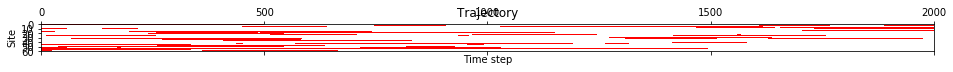

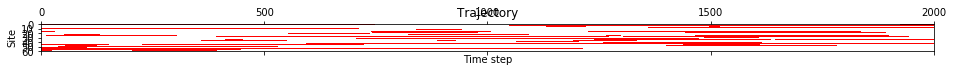

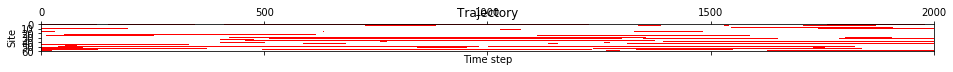

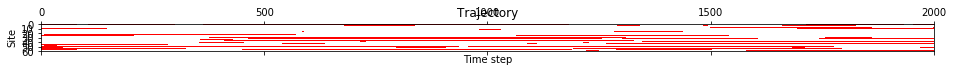

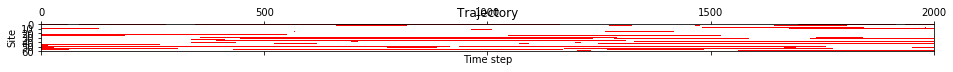

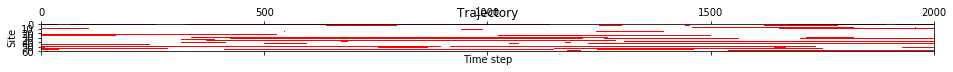

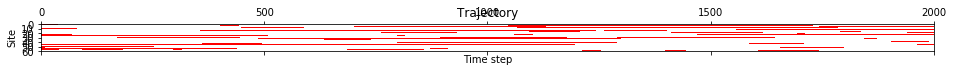

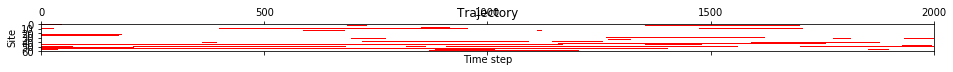

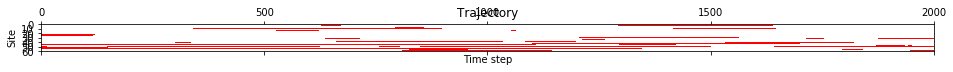

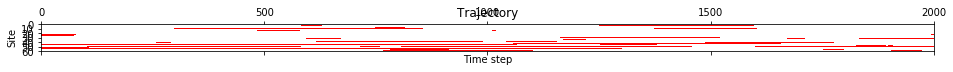

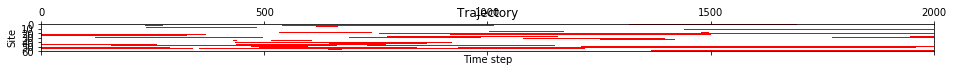

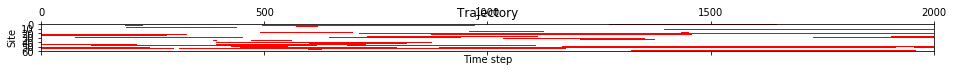

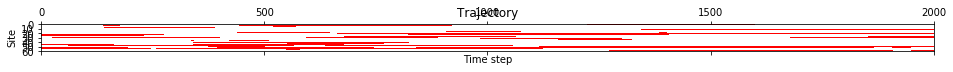

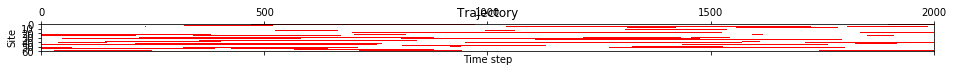

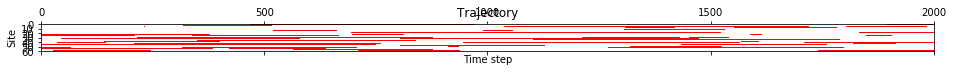

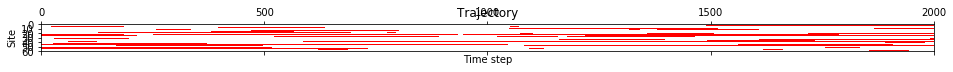

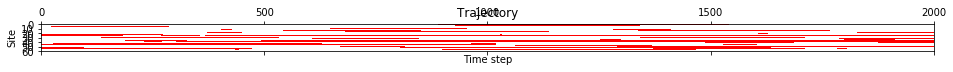

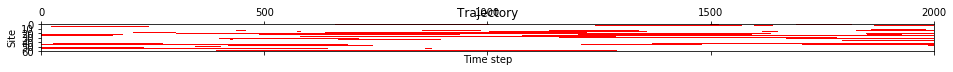

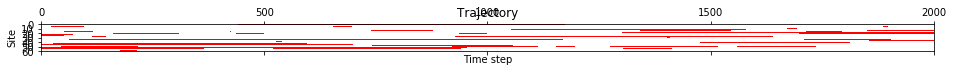

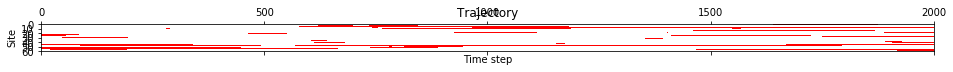

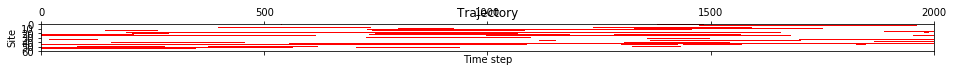

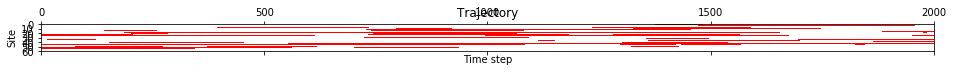

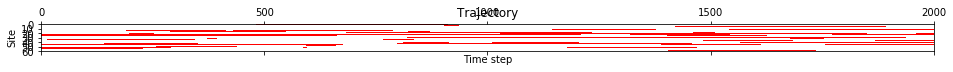

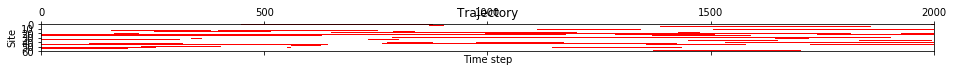

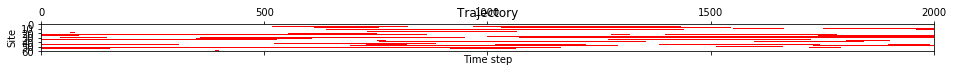

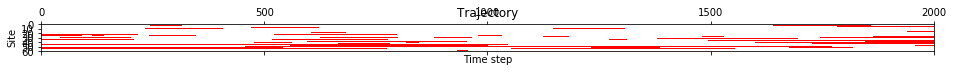

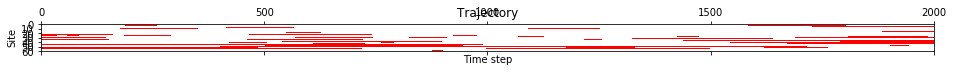

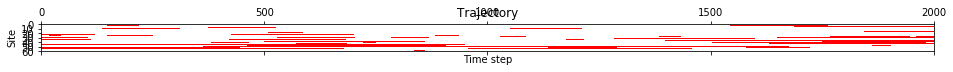

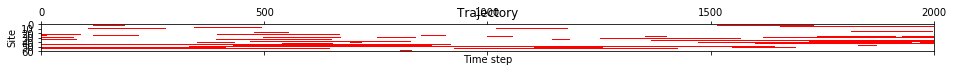

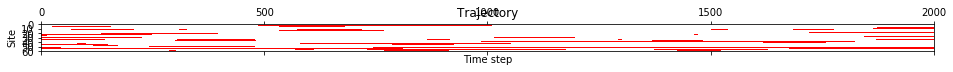

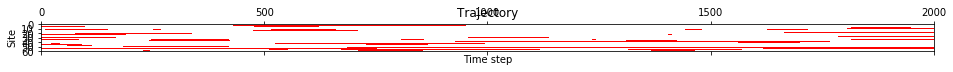

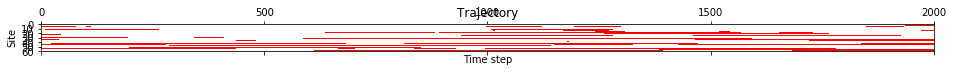

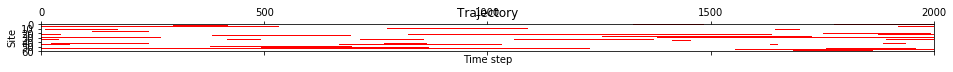

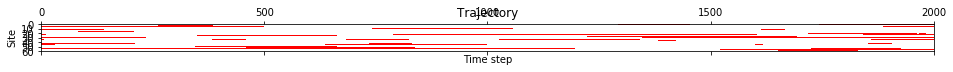

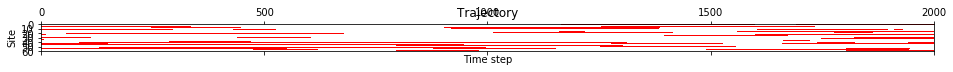

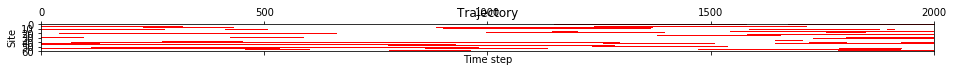

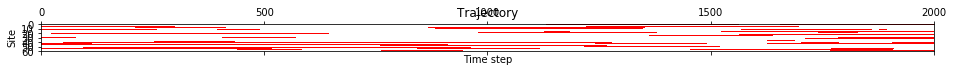

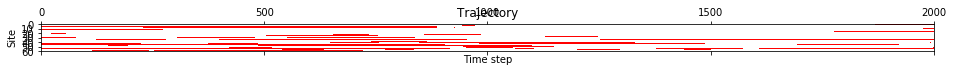

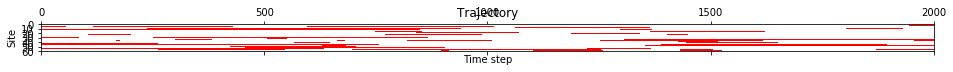

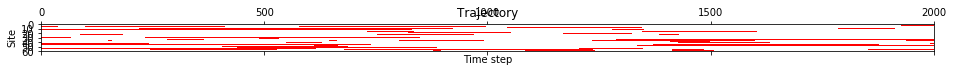

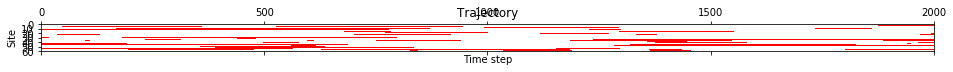

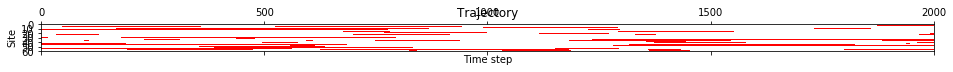

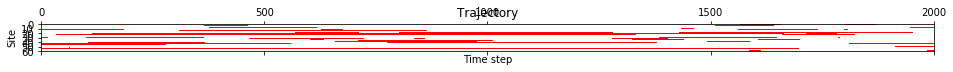

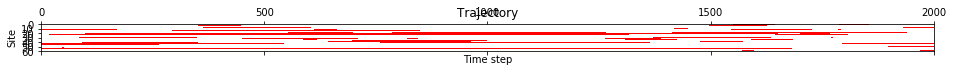

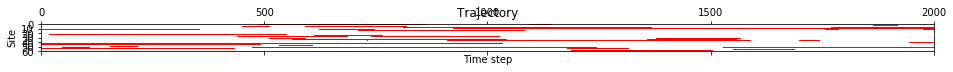

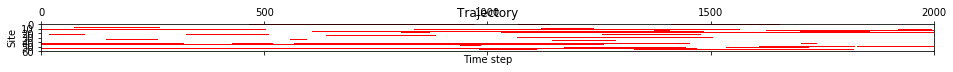

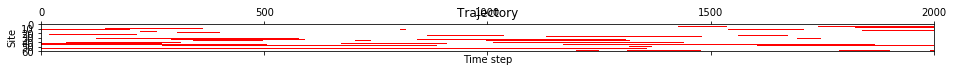

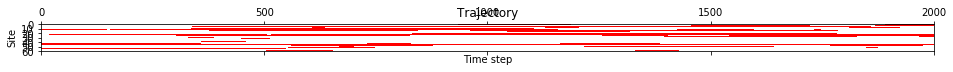

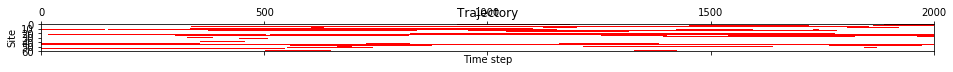

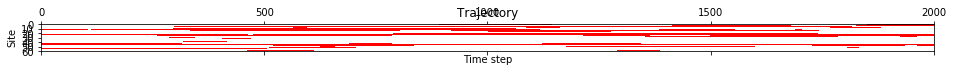

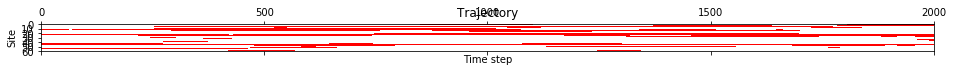

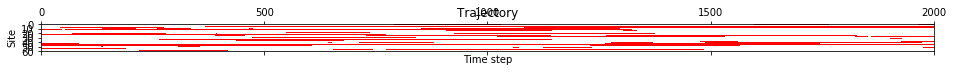

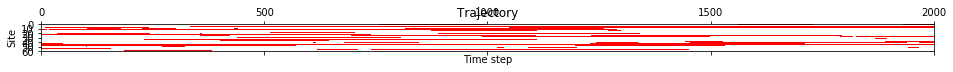

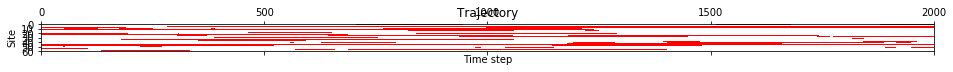

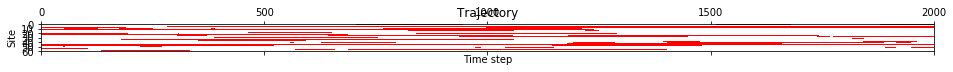

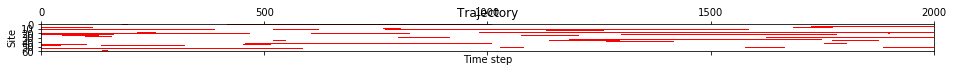

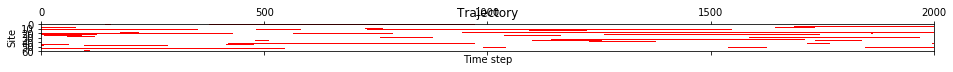

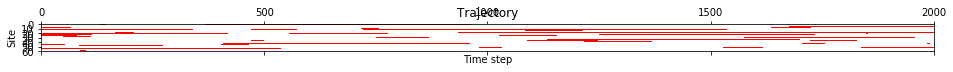

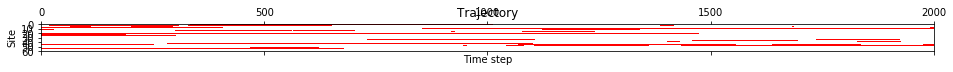

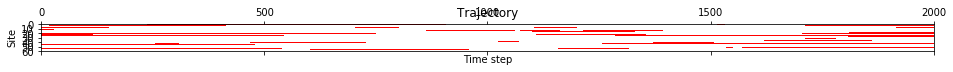

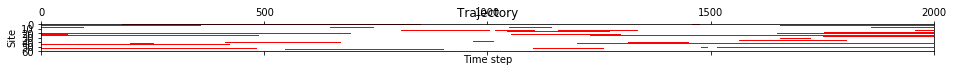

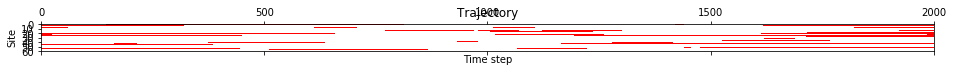

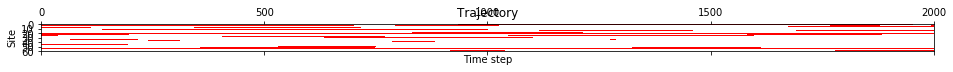

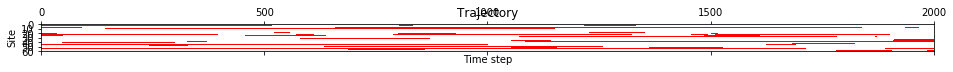

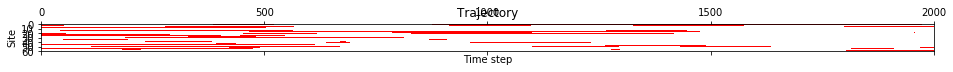

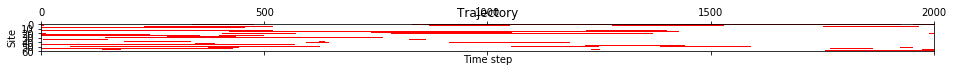

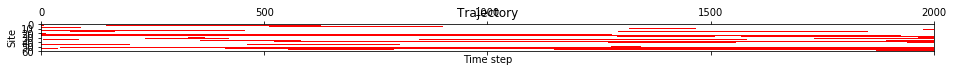

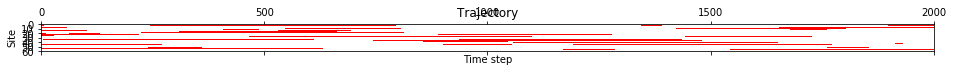

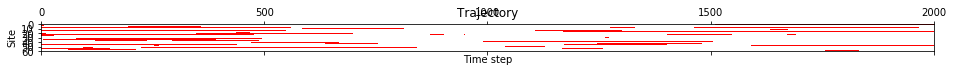

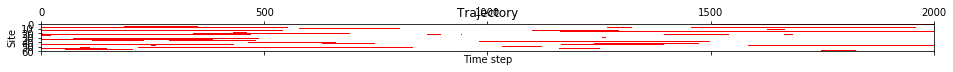

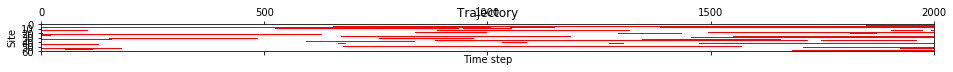

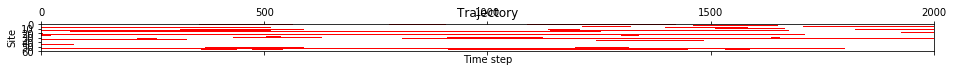

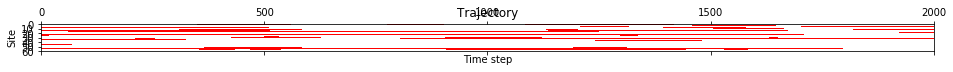

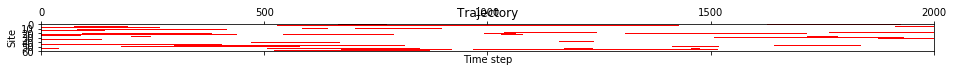

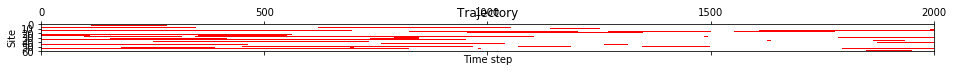

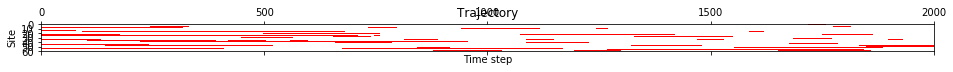

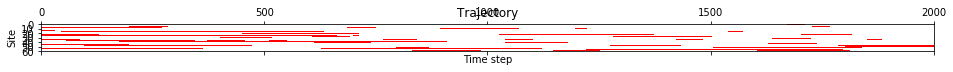

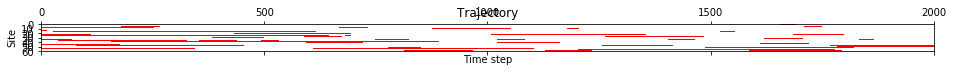

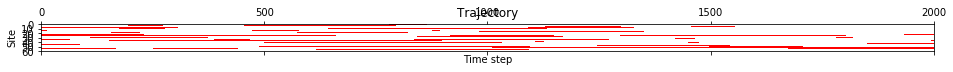

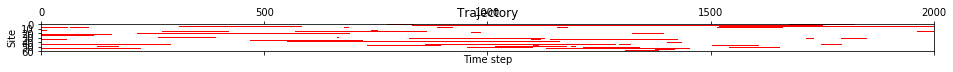

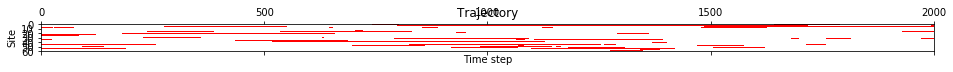

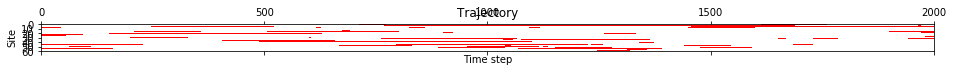

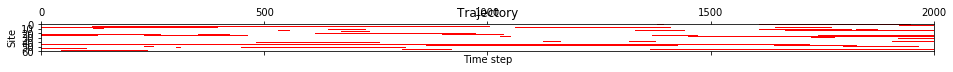

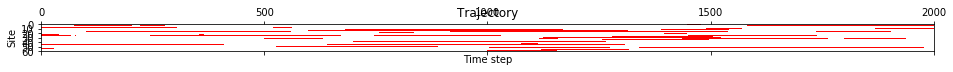

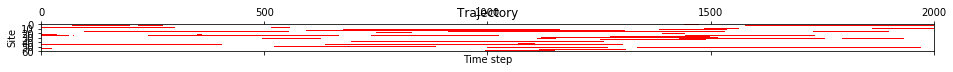

INFO:root:Softening parameter, \epsilon: 0.019
INFO:root:Neighboring spins; Rate activation; Rate inactivation
INFO:root:Neighbors [1 1]
INFO:root:Rate Activation 2.019
INFO:root:Rate Deactivation 0.50475
INFO:root:Neighbors [1 0]
INFO:root:Rate Activation 1.019
INFO:root:Rate Deactivation 0.25475
INFO:root:Neighbors [0 1]
INFO:root:Rate Activation 1.019
INFO:root:Rate Deactivation 0.25475
INFO:root:Neighbors [0 0]
INFO:root:Rate Activation 0.019
INFO:root:Rate Deactivation 0.00475
INFO:root:Biasing field: 0.01
INFO:root:Rate swap: 0.998006788436


Activity: 0.05848


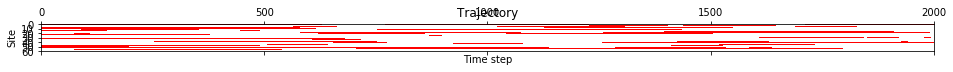

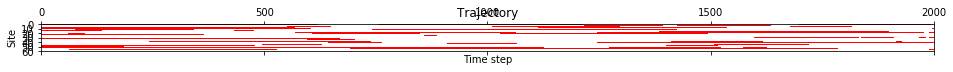

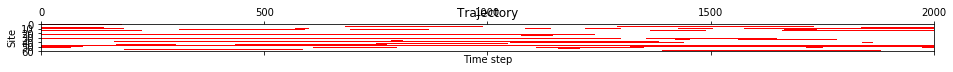

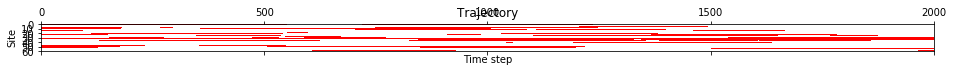

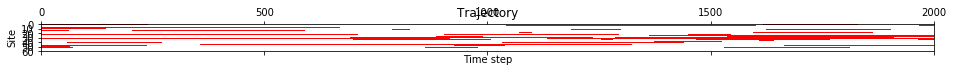

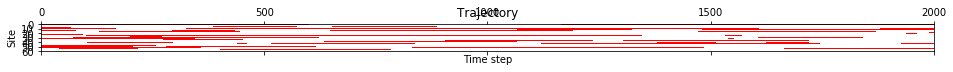

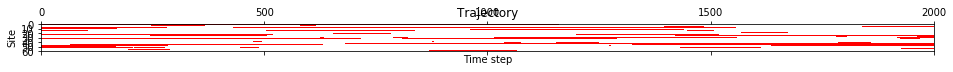

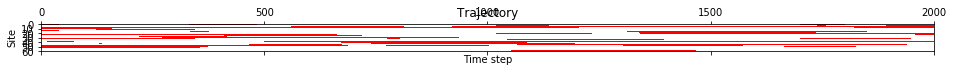

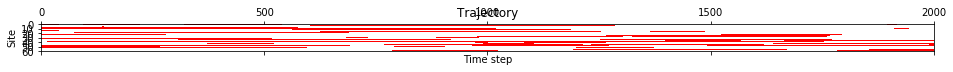

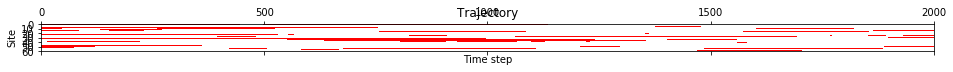

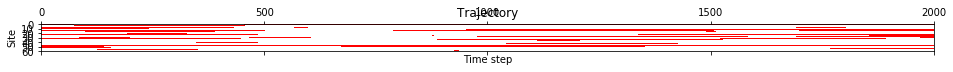

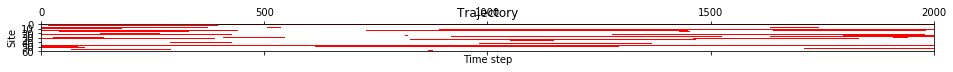

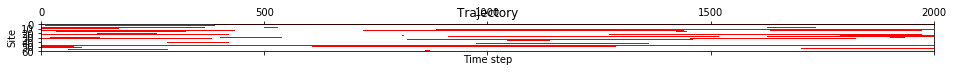

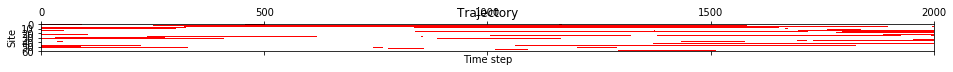

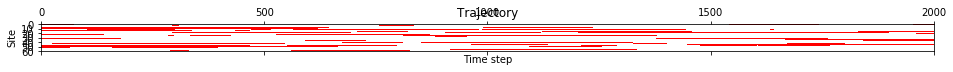

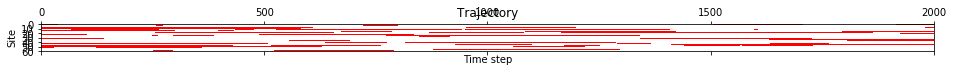

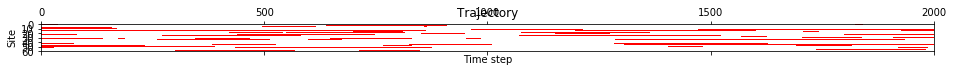

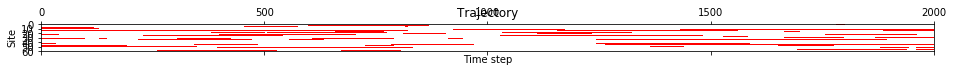

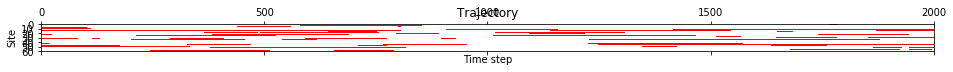

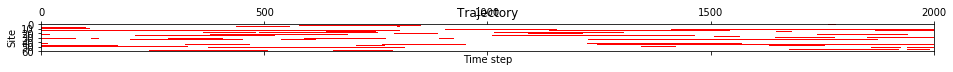

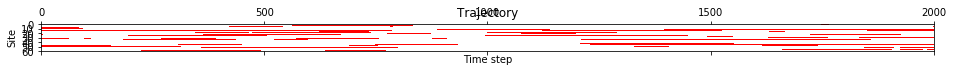

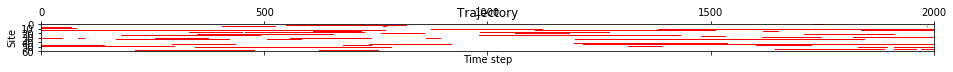

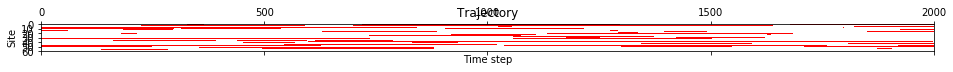

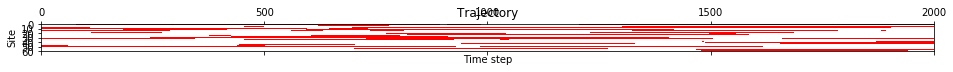

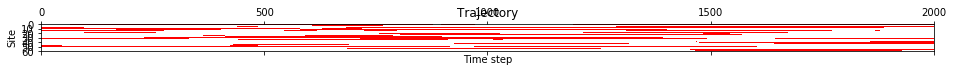

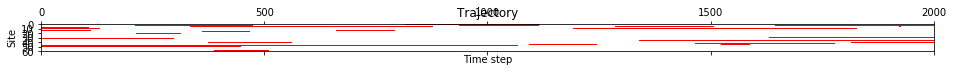

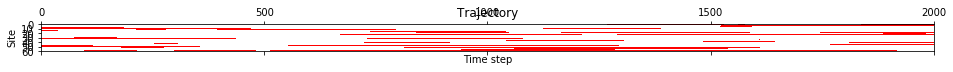

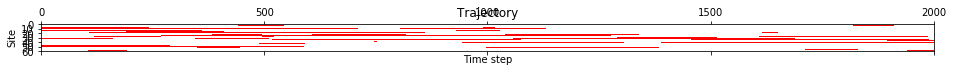

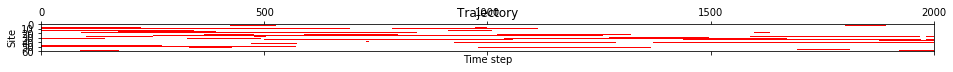

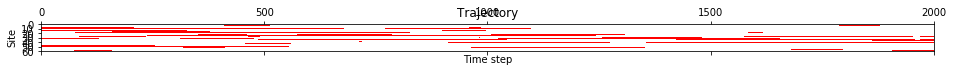

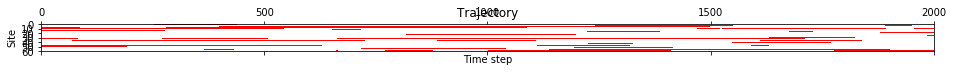

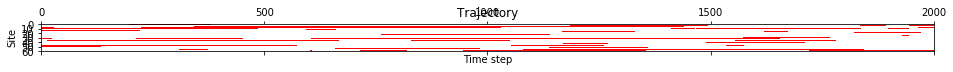

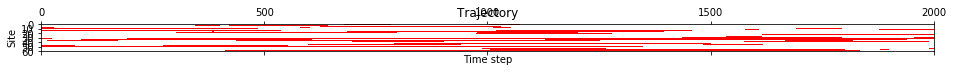

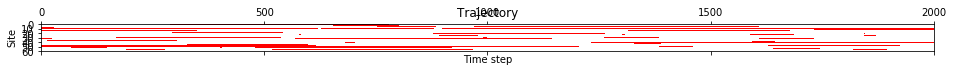

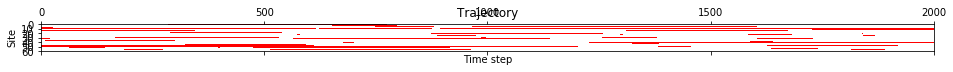

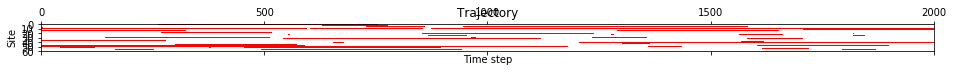

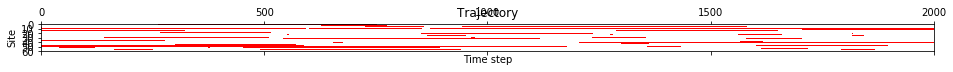

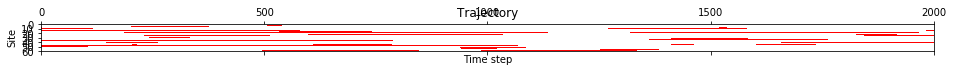

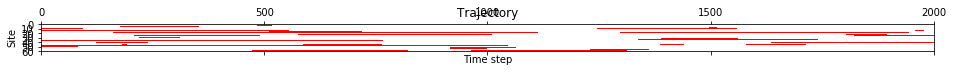

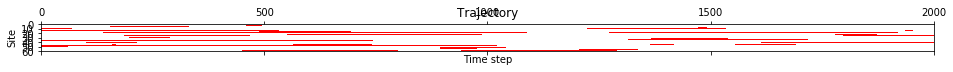

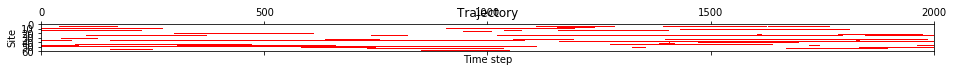

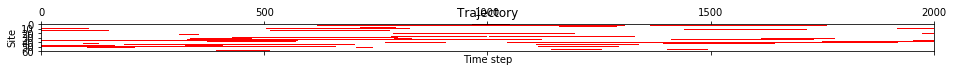

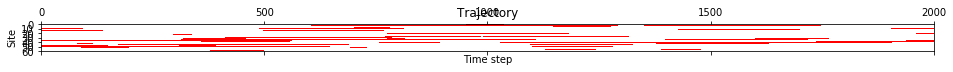

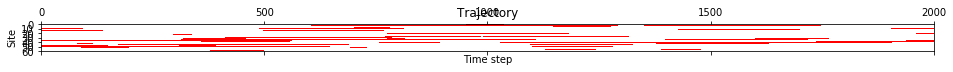

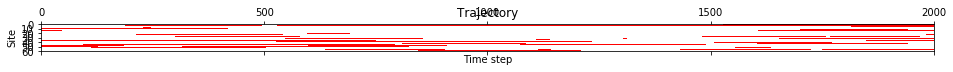

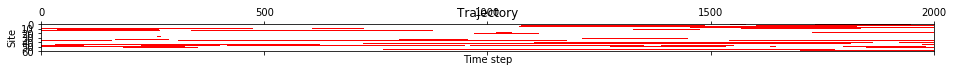

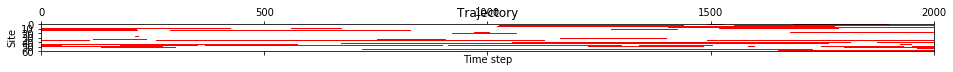

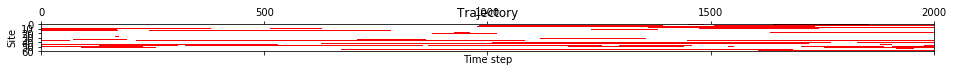

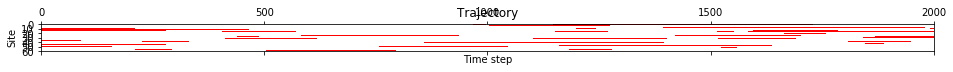

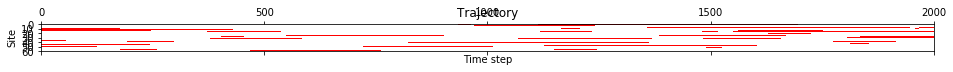

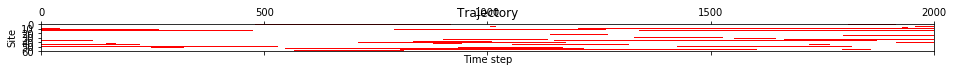

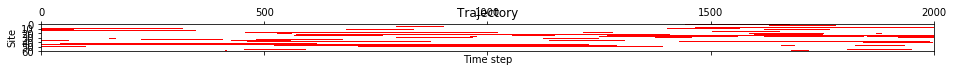

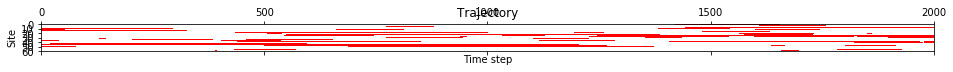

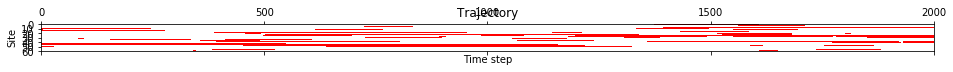

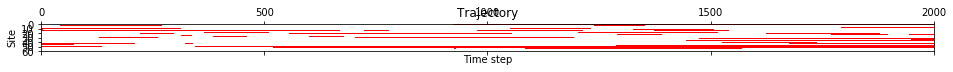

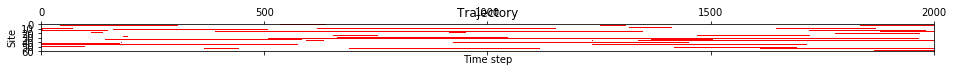

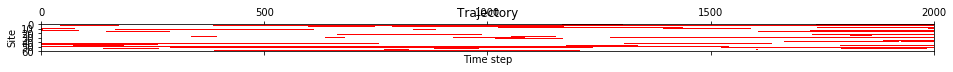

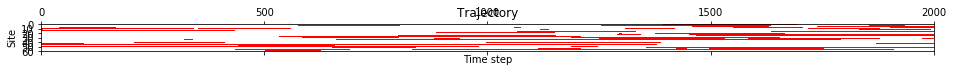

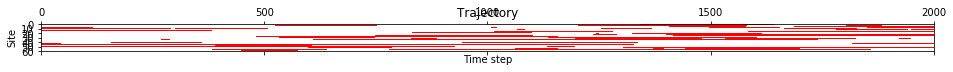

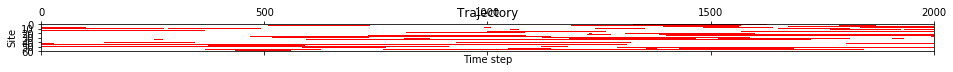

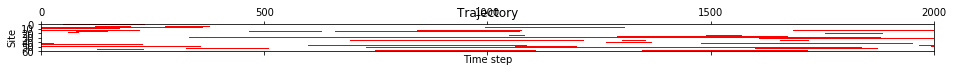

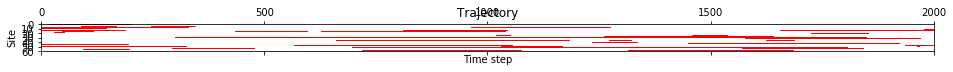

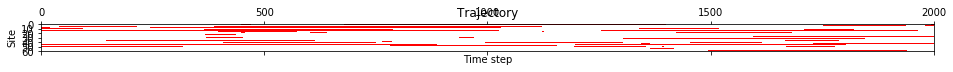

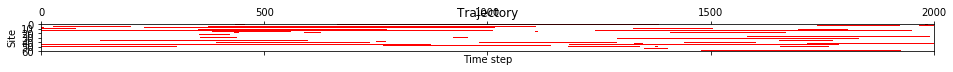

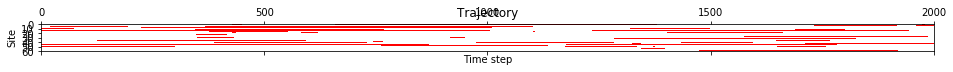

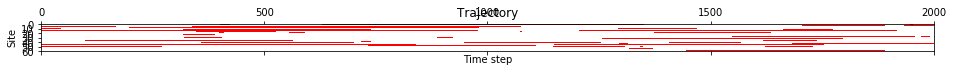

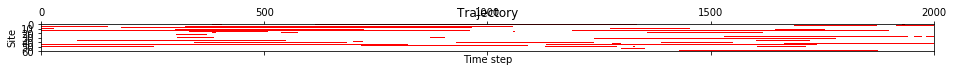

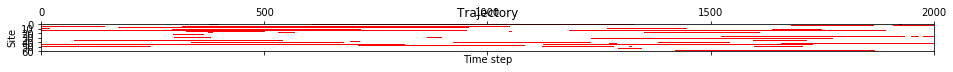

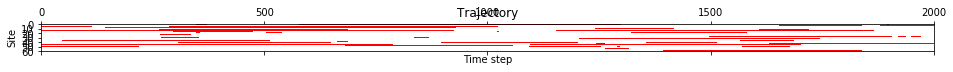

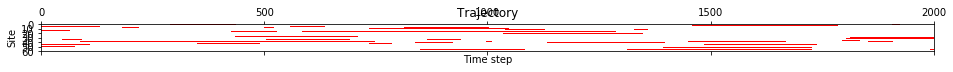

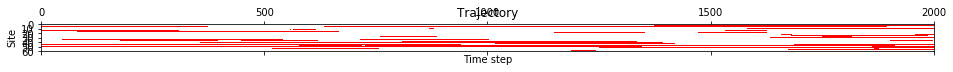

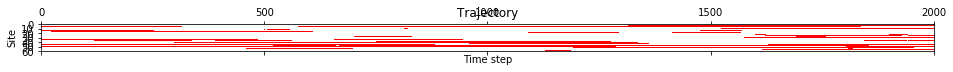

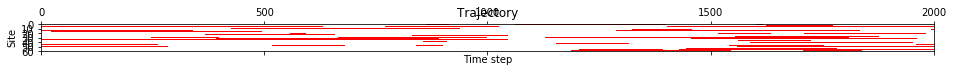

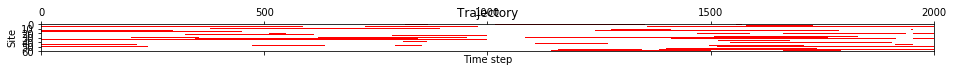

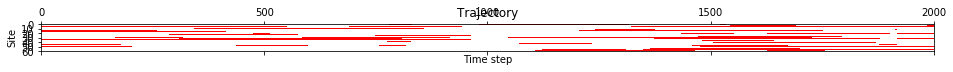

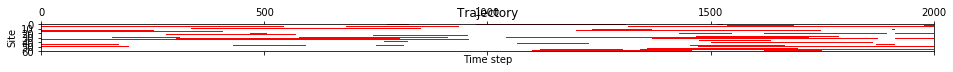

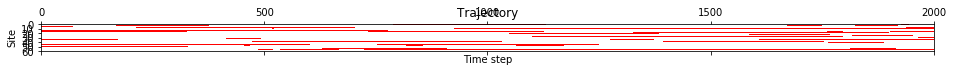

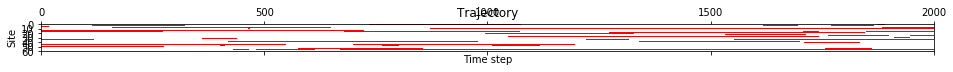

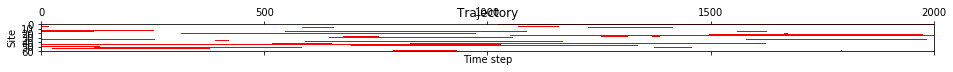

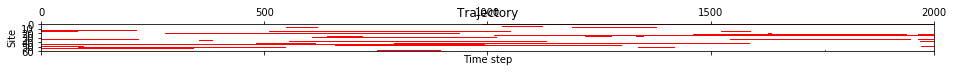

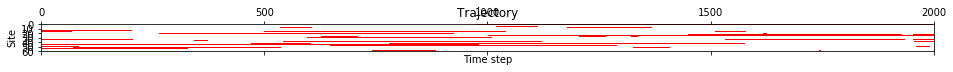

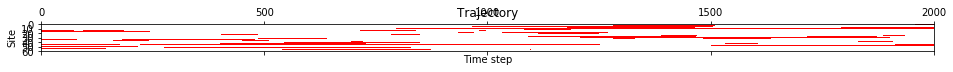

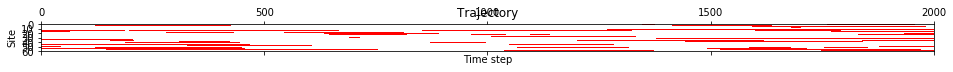

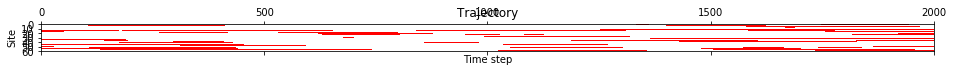

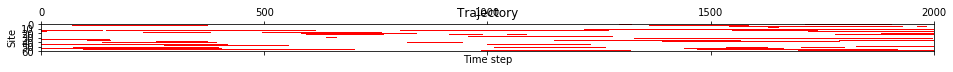

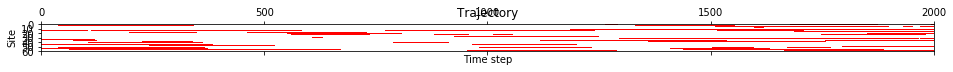

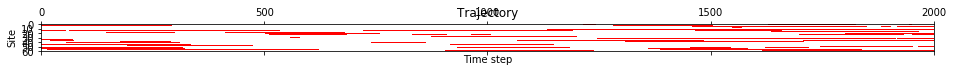

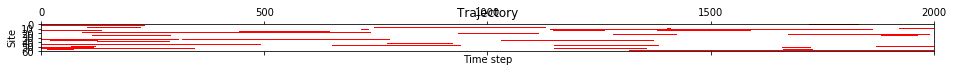

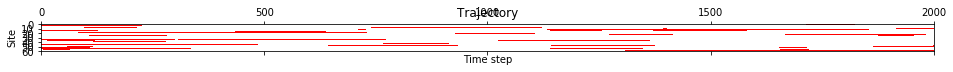

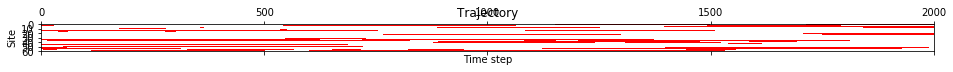

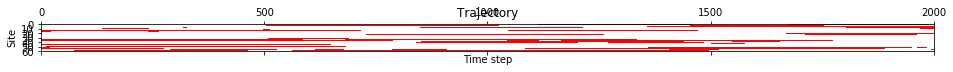

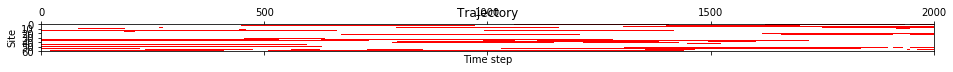

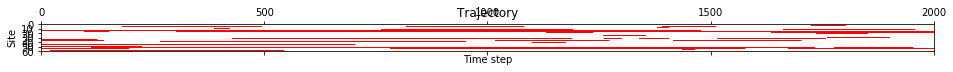

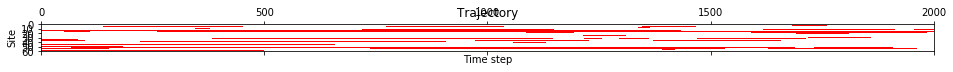

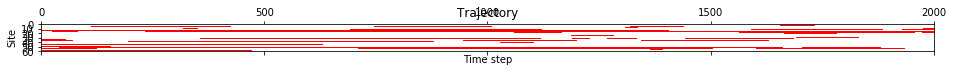

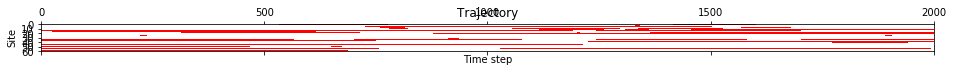

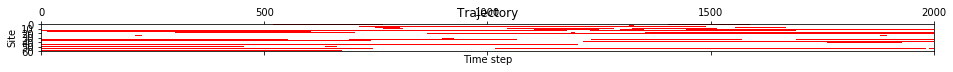

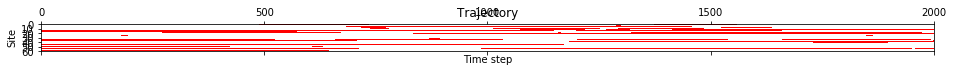

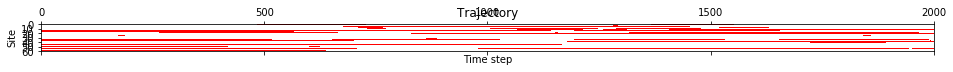

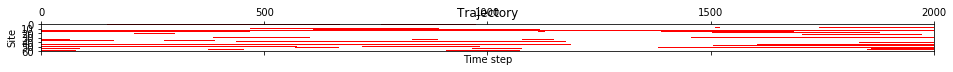

Activity: 0.058515


In [7]:
for eps in epsilons:
    logging.info("Softening parameter, \epsilon: {}".format(eps))
    fa_kcm = SoftenedFA(gamma=0.25, eps=eps, s=0.01,num_burnin_steps=500, num_sites=60, num_steps=2000)
    tps = TransitionPathSampler(fa_kcm, fa_kcm.activity)
    trajectory = fa_kcm.gen_trajectory()
    print("Activity: {}".format(tps.mc_average(100, verbose=True)))

In [5]:
for prob_transition in np.arange(0,1,0.1):
    fa_kcm = EastKCM(prob_transition=prob_transition, num_burnin_steps=500, num_sites=60, num_steps=600)
    tps = TransitionPathSampler(fa_kcm, fa_kcm.activity)
    trajectory = fa_kcm.gen_trajectory()
    print("Prob transition: {}; Activity: {}".format(prob_transition, tps.mc_average(100)))

AttributeError: 'EastKCM' object has no attribute 's'